## Full Data Analysis Project using Python & Power BI for StartUps Expansion

### Import Packages (Toolkit)

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import & Inspecting Data

In [109]:
startups = pd.read_excel('data/startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [110]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [111]:
startups[["Marketing Spend","Revenue"]].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


### Preprocessing Data

In [112]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [113]:
startups.duplicated().sum()

0

In [114]:
startups['City'].nunique()

149

In [115]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [116]:
startups['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [117]:
startups['State'].nunique()

35

In [118]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [119]:
startups['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [120]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [121]:
startups['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [122]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [123]:
startups['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

### Exploring & Analysing Data

In [124]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
112,113,Knoxville,Tennessee,Region 2,Old,3086,56504
32,33,Tyler,Texas,Region 2,Old,2984,21718
147,148,Rockford,Illinois,Region 1,New,2648,43377
10,11,Rialto,California,Region 2,Old,2541,16860
33,34,Charleston,South Carolina,Region 1,Old,2484,34829
88,89,Vista,California,Region 2,Old,2718,20949
20,21,Concord,California,Region 2,Old,2521,38178
131,132,West Jordan,Utah,Region 2,Old,2773,21056
110,111,Stamford,Connecticut,Region 1,Old,2901,46503
83,84,Cambridge,Massachusetts,Region 1,Old,2779,21286


<AxesSubplot:>

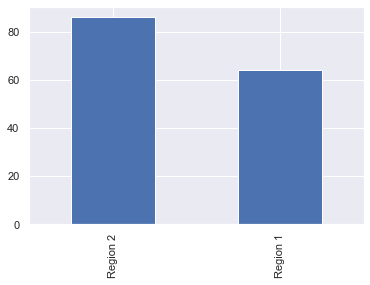

In [125]:
startups['Sales Region'].value_counts().plot.bar()

In [126]:
startups[startups['New Expansion']=='Old'].groupby(['State','City']).max()['Revenue'].nlargest(10)

State          City          
Arkansas       Little Rock       68828
Michigan       Grand Rapids      65475
New York       Rochester         64906
California     Oxnard            64302
               Fontana           63027
Rhode Island   Providence        62337
Alabama        Birmingham        60338
Kansas         Overland Park     59887
California     San Bernardino    59870
Massachusetts  Worcester         59840
Name: Revenue, dtype: int64

In [127]:
startups[startups['New Expansion']=='New'].groupby(['State','City']).max()['Revenue'].nlargest(10)

State       City            
Texas       Brownsville         63148
Tennessee   Chattanooga         55357
California  Rancho Cucamonga    52366
            Glendale            49376
Arizona     Tempe               48954
Illinois    Joliet              48315
            Rockford            43377
California  Thousand Oaks       40141
New Jersey  Paterson            34603
Texas       College Station     22457
Name: Revenue, dtype: int64

In [128]:
startups[startups['New Expansion']=='Old'].groupby('State').sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [129]:
startups[startups['New Expansion']=='New'].groupby('State').sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [130]:
pd.pivot_table(data=startups, values='Revenue',columns='New Expansion',index='State')

New Expansion,New,Old
State,,
Alabama,NaN,55256.250000
Arizona,48954.000000,41128.500000
Arkansas,NaN,68828.000000
California,47294.333333,36823.459459
Colorado,NaN,31299.000000
Connecticut,NaN,39627.750000
Florida,NaN,39918.583333
Georgia,NaN,39414.000000
Illinois,45846.000000,36240.333333


In [131]:
startups['Profit']= startups['Revenue'] - startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [132]:
#Return of Marketing Spend
startups['ROMS'] = round((startups['Profit']/startups['Marketing Spend'])*100,2)
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [133]:
#that's means each 1 dollar spend on Marketing Return k Dollars 
#ex StorID=1 in city Peoria return 17.68 Dollars for each one dollars spend on Marketing
startups['ROMS%'] = startups['ROMS']/100
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [134]:
startups.to_csv('data/startup-expansion-modified.csv')

==========

## Good Luck!